# Natural Language Processing	
1. Using NLP predict whether the review is positive or negative for a given dataset 


In [28]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
# Feature Scaling
from sklearn.preprocessing import StandardScaler
# NLTK libraries
import nltk
# cleaning the text
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
#Creating the Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report
from sklearn import metrics

#Classification library
from sklearn.tree import DecisionTreeClassifier

#Classification library
from sklearn.ensemble import RandomForestClassifier

# precision recall
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from inspect import signature
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings('ignore')
import importlib.util

In [2]:
# importing template file 
spec = importlib.util.spec_from_file_location("Util_class", "/home/admin1/PycharmProjects/Machine-Learning/Week 13/Util/util.py")
foo = importlib.util.module_from_spec(spec)
spec.loader.exec_module(foo)
# creating object of Template class
obj_util = foo.Util_class()

In [3]:
#Load dataset
# tsv = tab seperated value, to read this file use delimiter, and to remove double quotes use quoting = 3
dataset_original = pd.read_csv ("Restaurant_Reviews.tsv", delimiter = '\t', quoting = 3)
dataset = dataset_original
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
print("Dataset has {} rows and {} Columns".format(dataset.shape[0],dataset.shape[1])) 

Dataset has 1000 rows and 2 Columns


In [5]:
# check dataset information
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
Review    1000 non-null object
Liked     1000 non-null int64
dtypes: int64(1), object(1)
memory usage: 15.7+ KB


In [6]:
# descibe the dataset
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Liked,1000.0,0.5,0.50025,0.0,0.0,0.5,1.0,1.0


In [7]:
# handling missing data if nessesary
dataset.isnull().sum()

Review    0
Liked     0
dtype: int64

In [8]:
# check for duplicate values
dataset.duplicated().sum()

4

In [9]:
# dataset = dataset.drop_duplicates()

In [10]:
# Download nltk stopwords
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /home/admin1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [11]:
dataset.columns

Index(['Review', 'Liked'], dtype='object')

In [12]:
# cleaning the text
corpus = []
for i in range(dataset.shape[0]):
    # step1 -> Only taking letters
    # Here we only taking latter, others are removed
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
#     print(review)

    # step2 -> Convert all words into lower case
    review = review.lower()
#     print(review)
    # split to array(default delimiter is " ") 
    # Step3 -> take sentence into words
    #  Tokenization, involves splitting sentences and words from the body of the text.
    review = review.split()
#     print(review)

    # Step4 -> Remove Unnecessary words using stopwords 
    # Step5 -> Take rootwords using stem() func by importing PorterStemmer

    ps = PorterStemmer()
    # here we take set() function bcoz it goes through all the word faster to all words in list
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
#     print(review)

    # Step6 -> join all words
    review = ' '.join(review)
    
    # Step7 -> Append whole list
    corpus.append(review)
    


In [13]:
review

'wast enough life pour salt wound draw time took bring check'

In [14]:
# Step8 -> Creating the Bag of words model
# taking unique words and take one column fr one word then add all cols into table. When cols created for 
#each word it is each one is independent variable, & it allow us for classification model through the process 
#of tokenizer

cv = CountVectorizer(max_features=1500)
x = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

In [15]:
x.shape, y.shape

((1000, 1500), (1000,))

In [24]:
# import os
# create directory to store csv files
# os.mkdir("CSV_files")


### NLP by using - Naive_Bayes

x_train :  (800, 1500)  x_test :  (200, 1500)
x_train_data :  (640, 1500)  x_crossV_data :  (160, 1500)


Confusion Matrix:
 [[43 42]
 [12 63]]


Average accuracy_score: 66.25
Average precision-recall score: 57.90
Average Roc-AUC: 67.294
Accuracy by F1-score: 70.0

Model created with pickle file
-------------------------CROSS Validation-------------------------------------

 Accuracy: average_precision_score : 57.9

               precision    recall  f1-score   support

           0       0.78      0.51      0.61        85
           1       0.60      0.84      0.70        75

    accuracy                           0.66       160
   macro avg       0.69      0.67      0.66       160
weighted avg       0.70      0.66      0.65       160


 ROC curve 



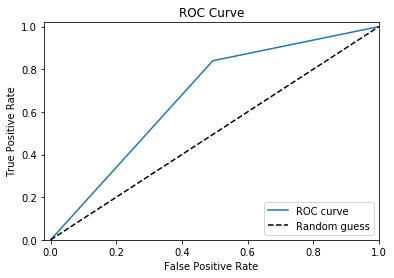

In [29]:
class Naive_Bayes():
    
    def create_module(self,x_train,y_train):
        # Fitting Naive Bayes to the Training set
        classifier = GaussianNB()
        classifier.fit(x_train, y_train)
        return classifier
        
def main():
    #class obj created
    obj  = Naive_Bayes()
    
    #split dataset into train, test and cross validation also save csv files
    x_train, x_cv,  y_train, y_cv = obj_util.splitdata(x, y, "CSV_files/Naive_Bayes_test.csv", 0.20,0.20)

#     # Feature Scalling for train and test data 
#     x_train = obj_util.feature_Scaling(x_train)
#     x_test = obj_util.feature_Scaling(x_test)
    
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_cv = sc.transform(x_cv)

    classifier = obj.create_module(x_train,y_train)
#     cl = nltk.NaiveBayesClassifier.train(x_train)
#     print(cl.show_most_informative_features(10))
#     print("\nModule created")
#     print("classifier object",classifier)

    y_pre = obj_util.y_prediction(x_cv, classifier)
#     print("\n\n y_prediction:",y_pre)
#     print(y_pre.shape)
    
    cm = obj_util.confusion_matrix(y_cv,y_pre)
    print("\n\nConfusion Matrix:\n",cm)
    
    accuracy_score,average_precision,auc, f1_score_acc = obj_util.accuracy(y_pre,y_cv)
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)
    print('Accuracy by F1-score:',f1_score_acc)

    obj_util.create_piklefile(classifier, sc, "Naive_Bayes.pkl")
    print("\nModel created with pickle file")
    
    print("-------------------------CROSS Validation-------------------------------------")
     # predict y
    y_pre = obj_util.y_prediction(x_cv, classifier)
    # Calculate accuracy
    accuracy = average_precision_score(y_cv, y_pre)* 100
    print("\n Accuracy: average_precision_score :", accuracy)

    print("\n",classification_report(y_cv, y_pre))

    y_pred_prob = classifier.predict_proba(x_cv)[:,1]

    print("\n ROC curve \n")
    fpr, tpr, thresholds =  metrics.roc_curve(y_cv, y_pred_prob)
    # create plot
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.xlim([-0.02, 1])
    plt.ylim([0, 1.02])
    plt.legend(loc="lower right")

if __name__ == '__main__':
    main()


### NLP by using - Decision Tree Classification 

x_train :  (700, 1500)  x_test :  (300, 1500)
x_train_data :  (560, 1500)  x_crossV_data :  (140, 1500)


Confusion Matrix:
 [[281   0]
 [  2 277]]


Average accuracy_score: 99.64285714285714
Average precision-recall score: 99.64
Average Roc-AUC: 99.642
Accuracy by F1-score: 99.64028776978417

Model created with pickle file
-------------------------CROSS Validation-------------------------------------

 Accuracy: average_precision_score : 63.79464285714286

               precision    recall  f1-score   support

           0       0.75      0.76      0.76        76
           1       0.71      0.70      0.71        64

    accuracy                           0.74       140
   macro avg       0.73      0.73      0.73       140
weighted avg       0.74      0.74      0.74       140


 ROC curve 



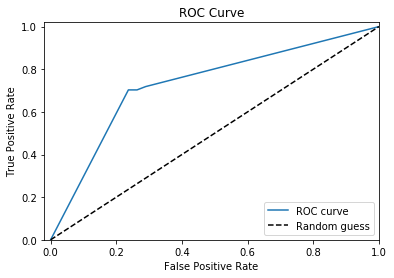

In [30]:
class DecisionTreeClassification():
    
    def create_module(self,x_train,y_train):
        # Fitting Decision Tree Classification to the Training set
        classifier = DecisionTreeClassifier(criterion= 'entropy', random_state=0)
        classifier.fit(x_train,y_train)
        return classifier
        
def main():
    #class obj created
    obj  = DecisionTreeClassification()
    
    #split dataset into train, test and cross validation also save csv files
    x_train, x_cv,  y_train, y_cv = obj_util.splitdata(x, y, "CSV_files/DecisionTree_Test.csv", 0.30,0.20)
    
    # feature Scaling
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_cv = sc.transform(x_cv)

    # fit model 
    classifier = obj.create_module(x_train,y_train)

    # predict y
    y_pre = obj_util.y_prediction(x_train, classifier)
    
    cm = obj_util.confusion_matrix(y_train,y_pre)
    print("\n\nConfusion Matrix:\n",cm)
    
    accuracy_score,average_precision,auc, f1_score_acc = obj_util.accuracy(y_pre,y_train)
    
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)
    print('Accuracy by F1-score:',f1_score_acc)

    obj_util.create_piklefile(classifier, sc, "DecisionTreeClassification.pkl")
    print("\nModel created with pickle file")
    
    print("-------------------------CROSS Validation-------------------------------------")
     # predict y
    y_pre = obj_util.y_prediction(x_cv, classifier)
    
    accuracy = average_precision_score(y_cv, y_pre)* 100
    print("\n Accuracy: average_precision_score :", accuracy)


    print("\n",classification_report(y_cv, y_pre))

    y_pred_prob = classifier.predict_proba(x_cv)[:,1]

    print("\n ROC curve \n")
    fpr, tpr, thresholds = roc_curve(y_cv, y_pred_prob)
    # create plot
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.xlim([-0.02, 1])
    plt.ylim([0, 1.02])
    plt.legend(loc="lower right")
    
if __name__ == '__main__':
    main()


### NLP by using - Random_forest Classification 

x_train :  (700, 1500)  x_test :  (300, 1500)
x_train_data :  (560, 1500)  x_crossV_data :  (140, 1500)


Confusion Matrix:
 [[65 11]
 [25 39]]


Average accuracy_score: 74.28571428571429
Average precision-recall score: 65.39
Average Roc-AUC: 73.232
Accuracy by F1-score: 68.42105263157895

Model created with pickle file
-------------------------CROSS Validation-------------------------------------

 Accuracy: average_precision_score : 65.38839285714286

               precision    recall  f1-score   support

           0       0.72      0.86      0.78        76
           1       0.78      0.61      0.68        64

    accuracy                           0.74       140
   macro avg       0.75      0.73      0.73       140
weighted avg       0.75      0.74      0.74       140


 ROC curve 



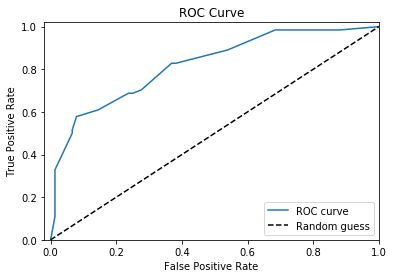

In [31]:
class Random_forest():
    
    def create_module(self,x_train,y_train):
        # Fitting Random_forest Classification to the Training set
        classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
        classifier.fit(x_train,y_train)
        return classifier
        
def main():
    #class obj created
    obj  = Random_forest()
    
 #split dataset into train, test and cross validation also save csv files
    x_train, x_cv,  y_train, y_cv = obj_util.splitdata(x, y, "CSV_files/Random_forest_Test.csv", 0.30,0.20)
    
    # feature Scaling
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_cv = sc.transform(x_cv)

    # fit model 
    classifier = obj.create_module(x_train,y_train)

    # predict y
    y_pre = obj_util.y_prediction(x_cv, classifier)
    
    cm = obj_util.confusion_matrix(y_cv,y_pre)
    print("\n\nConfusion Matrix:\n",cm)
    
    accuracy_score,average_precision,auc, f1_score_acc = obj_util.accuracy(y_pre,y_cv)
    
    print('\n\nAverage accuracy_score:' , accuracy_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('Average Roc-AUC: %.3f' % auc)
    print('Accuracy by F1-score:',f1_score_acc)

    obj_util.create_piklefile(classifier,sc, "Random_forest.pkl")
    print("\nModel created with pickle file")
    
    print("-------------------------CROSS Validation-------------------------------------")
     # predict y
    y_pre = obj_util.y_prediction(x_cv, classifier)
    
    accuracy = average_precision_score(y_cv, y_pre)* 100
    print("\n Accuracy: average_precision_score :", accuracy)


    print("\n",classification_report(y_cv, y_pre))

    y_pred_prob = classifier.predict_proba(x_cv)[:,1]

    print("\n ROC curve \n")
    fpr, tpr, thresholds = roc_curve(y_cv, y_pred_prob)
    # create plot
    plt.plot(fpr, tpr, label='ROC curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.xlim([-0.02, 1])
    plt.ylim([0, 1.02])
    plt.legend(loc="lower right")

if __name__ == '__main__':
    main()
